In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [18]:
mnist=input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
tf.reset_default_graph()

In [0]:
num_inputs=784
neuron_hid1=392
neuron_hid2=196
neuron_hid3=neuron_hid1
num_outputs=num_inputs

In [0]:
learning_rate=0.01
actf=tf.nn.relu

In [0]:
x=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [0]:
initializer=tf.variance_scaling_initializer()

In [0]:
w1=tf.Variable(initializer([num_inputs,neuron_hid1]), dtype=tf.float32)
w2=tf.Variable(initializer([neuron_hid1,neuron_hid2]), dtype=tf.float32)
w3=tf.Variable(initializer([neuron_hid2,neuron_hid3]), dtype=tf.float32)
w4=tf.Variable(initializer([neuron_hid3,num_outputs]), dtype=tf.float32)

In [0]:
b1=tf.Variable(tf.zeros(neuron_hid1))
b2=tf.Variable(tf.zeros(neuron_hid2))
b3=tf.Variable(tf.zeros(neuron_hid3))
b4=tf.Variable(tf.zeros(num_outputs))

In [0]:
act_func=tf.nn.relu

In [0]:
hid_layer1=act_func(tf.matmul(x,w1)+b1)
hid_layer2=act_func(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=act_func(tf.matmul(hid_layer2,w3)+b3)
output_layer=act_func(tf.matmul(hid_layer3,w4)+b4)

In [0]:
loss=tf.reduce_mean(tf.square(output_layer-x))
optimizer=tf.train.AdamOptimizer(learning_rate)
train=optimizer.minimize(loss)
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [34]:
num_epochs=5
batch_size=150
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(num_epochs):
    num_batches=mnist.train.num_examples // batch_size
    for iteration in range(num_batches):
      x_batch,y_batch=mnist.train.next_batch(batch_size)
      sess.run(train, feed_dict={x:x_batch})
    training_loss=loss.eval(feed_dict={x:x_batch})
    print("EPOCHS: {} LOSS: {}".format(epoch,training_loss))
  saver.save(sess,'./example_mnist_stacked_autoencoder.ckpt')

EPOCHS: 0 LOSS: 0.02610182948410511
EPOCHS: 1 LOSS: 0.024310553446412086
EPOCHS: 2 LOSS: 0.022196566686034203
EPOCHS: 3 LOSS: 0.02258424460887909
EPOCHS: 4 LOSS: 0.022153552621603012


In [35]:
num_test_images=10
with tf.Session() as sess:
  saver.restore(sess,'./example_mnist_stacked_autoencoder.ckpt')
  results=output_layer.eval(feed_dict={x:mnist.test.images[:num_test_images]})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./example_mnist_stacked_autoencoder.ckpt


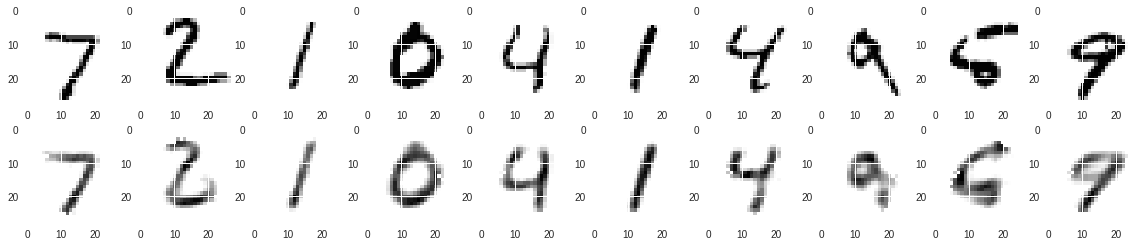

In [36]:
f,a=plt.subplots(2, 10, figsize=(20,4))
for i in range(num_test_images):
  a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
  a[1][i].imshow(np.reshape(results[i], (28,28)))